<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
>* KNN을 활용한 Multiple Classification
>* KNN의 한계 (확률적인 분포 한계)
>* Logistic Regression

#KNN을 활용한 Multiple Classification

>* pandas의 unique 메서드
>* Estimator의 predict_proba 메서드, 각 class에 대한 예측값 출력
>* 슬라이싱 연산자의 리턴 값은 1차원 리스트가 아니다.

In [30]:
import pandas as pd

fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# pandas의 unique 메서드
# 어떤 종류가 있는 지에 대한 메서드
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# Input Data, Species를 제외한 나머지 데이터로 input data를 만듬

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
# Target Data, Species 열을 target으로 변환

fish_target = fish['Species'].to_numpy()

In [5]:
# Train Set, Test Set Split

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [6]:
# Standard Preprocessing

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
# KNN 분류 모델 훈련 및 성능 확인

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)

kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [8]:
# KNN의 Class가 무엇이 있는지 kn.classes_로 확인 가능
# 알파벳은 사전순으로 출력

print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [9]:
# Test Set에서 앞에 5개의 데이터는 무엇으로 예측하는지 확인

print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [10]:
# predict_proba 메서드를 통해 Sample에 대한 Class 별 예측값 출력

import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_)
print(np.round(proba, decimals = 4)) 
# round = 반올림 메서드, round(number, n+1에서 반올림하여 n자리로 표현)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [11]:
# kneighbors 메서드는 항상 2차원 배열을 넘겨줘야 한다.
# 넘파이의 슬라이싱 연산자를 활용하면 1차원이 아닌 2차원으로 형성되므로 이런 팁을 활용

distances, indexes = kn.kneighbors(test_scaled[3:4])

print(train_target[indexes])

# test: 넘파이 슬라이싱 연산자를 사용하면 2차원 배열로 형성됨

# 슬라이싱 연산자로 여러 배열을 뽑을 일이 많다보니 왜 2차원 배열로 나오는지 알겠다.
print(test_scaled[3]) # 1차원 배열
print(test_scaled[3:4]) # 2차원 배열

[['Roach' 'Perch' 'Perch']]
[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
[[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]]


# Logistic Regression
>* 위 KNN으로 Multiple Classification을 K가 3일 때로 진행할 때, 모든 확률은 0/3, 1/3, 2/3, 3/3이 전부가 된다.
>* 로지스틱 회귀는 이름은 회귀지만 분류 모델이다. 선형 회귀와 동일하게 선형 방정식을 학습한다.
>* 방정식의 결과 값으로 나오는 z는 Sigmoid Function으로 값을 바꾸어 0 ~ 100%로 표현하여 확률로 표현 가능하다.
>* +
>* Logistic Regression을 이용한 Binary Classification <b>(Sigmoid Funcion)</b>
>* Logistic Regression을 이용한 Multiple Classification <b>(Softmax Funcion)</b>
>* +
>* Boolean Indexing, True인 값만 가져오는 것
>* decision_function 메서드, 학습되어 만들어진 선형 방정식에서 함숫값을 가져오는 메서드
>* scipy의 expit 함수
>* scipy의 softmax 함수
>* numpy의 round 함수, (decimals = 자리수)

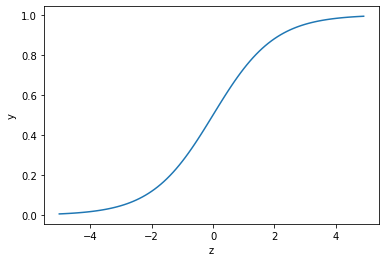

In [12]:
# Sigmoid Function

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # Sigmoid Function(or Logistic Function)
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('y')
plt.show()

In [13]:
# Logistic Regression을 이용한 Binary Classification을 해보자.
# 0.5보다 크면 Positive Class, 작으면 Negative Class로 판단
# + 딱 0.5가 될 경우, 라이브러리마다 다르지만 사이킷런은 Negative Class로 판단한다.

# Boolean Indexing
# 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다.
# True에 해당하는 행을 가져올 수 있다.

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
true_or_false = np.array([True, False, True, False, False])
print(char_arr[true_or_false])

['A' 'C']


In [14]:
# 조건식에 따라 배열에 index에 따른 Boolean 값을 저장함
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

# 여기서 Boolean Indexing이 적용되는 것임
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [16]:
# 위에서 5번째 훈련 데이터까지만 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [17]:
# 5개의 데이터에 관한 확률
print(lr.predict_proba(train_bream_smelt[:5])) 

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [18]:
# 현재 모델은 어떤 Class들을 알고있는가
print(lr.classes_)

['Bream' 'Smelt']


In [19]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [20]:
# Logistic Regression의 메서드에서 decision_function 메서드를 사용하면
# 데이터에 대한 함수값(z)을 알 수 있음

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [21]:
# 해당 z들을 사이파이 라이브러리의 시그모이드 함수를 사용하여
# np.exp()함수를 사용해 분수 계산을 하는 것보다 훨씬 편하고 안전함
# expit() 함수

from scipy.special import expit
print(expit(decisions))

# 출력 값을 보면 predict_proba의 메서드에서 2번째 열과 동일한 값을 가지는 것을 확인
# decision_function 메서드는 양성 클래스에 대한 z 값을 반환하는 것을 알 수 있음

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [22]:
# Logistic Regression을 통한 Multiple Classification

# max_iter 반복 횟수, C = Ridge에서 alpha로 규제를 하듯이 C로 규제를 함.
# 릿지와 같이 계수의 제곱을 규제한다. 이런 규제를 L2 규제라고 한다.

lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [23]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [24]:
print(lr.classes_)

# 각 Class에 대한 확률 표현
print(np.round(lr.predict_proba(test_scaled[:5]), decimals = 3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [25]:
# Softmax Function
# Sigmoid Function과 다름

# 5열은 한 선형방정식에 대한 coefficient 개수를 뜻하는데 7개고, intercept 값이 7개라는 것을 알 수 있음
# 즉, Multiple Classification은 Class의 개수만큼 선형방정식을 사용한다고 볼 수 있다.
print(lr.coef_.shape, lr.intercept_.shape)

# 이를 확률로 나타내기 위해 한 sample에 대하여 z1, z2, ... , zn개의 함숫값을 모두 구하여
# 지수 함수 e^z1, e^z2, ..., e^zn을 계산해 모두 더한다.
# 이를 e_sum이라 하고, e^z1을 e_sum으로 나누면 각 클래스에 대한 확률을 알 수 있고,
# 모두 더했을 때, 1이라는 값을 갖게 된다.

(7, 5) (7,)


In [26]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [27]:
from scipy.special import softmax

proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
